# Задача 2.3

Известно, что электричка "Вашингтон-Петушки" аварийно останавливается раз в несколько дней. Аналитики РЖД проанализировали, сколько дней электричка едет без поломок, и составили выборку: $X = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15)$.

РЖД хочет проверить гипотезу, что дисперсия распределения равна 9 против правосторонней альтернативы.

**Требуется**:
1. Ввести предположение, каким распределением описывается данная выборка.
2. Записать задачу формально.
3. Предложить критерий для оценки дисперсии распределения.
4. Проверить гипотезу о значении дисперсии распределения для уровня значимости $\alpha = 0.05$ аналитически.
5. Вывести и получить доверительный интервал для значения дисперсии при $\alpha = 0.05$.

Все выкладки должны быть сделаны аналитически, без использования компьютера. Допускается использование компютера для подстановки численых значений в финальную формулу.

In [36]:
import numpy as np
from statsmodels.stats.proportion import proportions_chisquare
import matplotlib.pyplot as plt
import scipy.stats as st

In [26]:
data = np.array([3, 22, 13, 6, 18, 5, 6, 10, 7, 15])

## Ввести предположение, каким распределением описывается данная выборка.

Проверим выборку на нормальность.

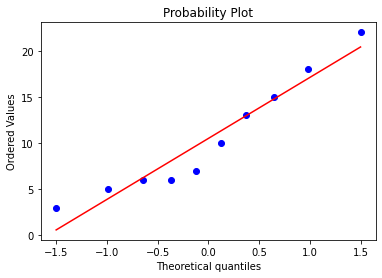

In [27]:
qq_points, qq_line = st.probplot(data, plot=plt)
plt.show()

In [29]:
st.shapiro(data)

ShapiroResult(statistic=0.9227311015129089, pvalue=0.38029807806015015)

$p-value > 0.05$, следовательно, данные не противоречат гипотезе, утверждающей нормальность выборки.

## Формальная постановка задачи:

$H_0: \sigma^2 = \sigma_0^2 = 9 \\ H_1: \sigma^2 > 9$

## В процедуре проверки гипотезы будет использован критерий:

$\Phi = (n - 1)\cdot \frac{s^2}{\sigma_0^2}$

$s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})}{n - 1}$

$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$

Критерий $\Phi$ имеет распределение $\chi^2$  с ($n-1$) степенями свободы.

In [53]:
mean = data.mean()
std = data.std()
n = len(data)
std_0 = 9

s2 = 0
for i in range(n):
    s2 += (data[i] - mean)**2
s2 /= (n - 1)

criterion = (n - 1) * s2 / std_0
criterion

39.388888888888886

<img src="2.jpg">

## Проверить гипотезу о значении дисперсии распределения для уровня значимости $\alpha = 0.05$.

Следовательно, для правосторонней гипотезы:

In [54]:
p = 1 - st.distributions.chi2.cdf(criterion, n - 1)
p

9.801382711449591e-06

$p-value < 0.05$, значит нулевая гипотеза отвергается.

## Вывести и получить доверительный интервал для значения дисперсии при $\alpha = 0.05$.

<font size="5">
$\mathbb{P}(\chi^2_{1 - \frac{\alpha}{2}, n - 1} < criterion < \chi^2_{\frac{\alpha}{2}, n - 1}) = 1 - \alpha$
</font>    

<font size="5">
$\mathbb{P}(\chi^2_{1 - \frac{\alpha}{2}, n - 1} < \frac{s^2\cdot (n - 1)}{\sigma^2} < \chi^2_{\frac{\alpha}{2}, n - 1}) = 1 - \alpha$
</font>

<font size="5">
$\mathbb{P}(\frac{s^2\cdot (n - 1)}{\chi^2_{1 - \frac{\alpha}{2}, n - 1}} < \sigma^2 < \frac{s^2\cdot (n - 1)}{\chi^2_{\frac{\alpha}{2}, n - 1}}) = 1 - \alpha$
</font>

<font size="5">
Доверительные интервалы для дисперсии: $\left[\sqrt{\frac{s^2\cdot (n - 1)}{\chi^2_{1 - \frac{\alpha}{2}, n - 1}}}; \sqrt{\frac{s^2\cdot (n - 1)}{\chi^2_{\frac{\alpha}{2}, n - 1}}}\right]$
</font>

In [58]:
alpha = 0.05
left = s* (n - 1) / (st.chi2(n - 1).ppf(1 - (alpha / 2)))
right = s* (n - 1) / (st.chi2(n - 1).ppf(alpha / 2))
print("Доверительный интервал для значения дисперсии при alpha = 0.05 равны [",
      np.sqrt(left).round(2), ";", np.sqrt(right).round(2), "]" )

Доверительный интервал для значения дисперсии при alpha = 0.05 равны [ 12.95 ; 34.37 ]
